#  Evaluating Training of Perceptron and Adaline models  based on an Iris Dataset

In [5]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [6]:
file="iris-with-answers.csv"
data=pd.read_csv(file)


In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.shape

(150, 5)

In [10]:
data1=data.iloc[:,[True,False,True,False,True]]

In [11]:
data1.shape

(150, 3)

In [12]:
data1.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
lst=["setosa","versicolor"]

In [14]:
data1=data1[data1["species"].isin(lst)]

In [15]:
data1.species.unique()

array(['setosa', 'versicolor'], dtype=object)

In [16]:
data1

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
...,...,...,...
95,5.7,4.2,versicolor
96,5.7,4.2,versicolor
97,6.2,4.3,versicolor
98,5.1,3.0,versicolor


In [29]:
#x=data1.iloc[:100,[0,1]].values


In [35]:
X=data1[["sepal_length","petal_length"]]
Y=data1["species"].values

In [36]:
Y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [37]:
Y=np.where(Y=="setosa",-1.0,1.0)
Y

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

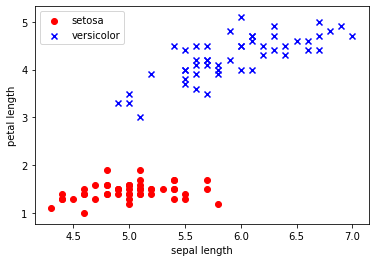

In [38]:
plt.scatter(x[:50,0],x[:50,1],color="red",label="setosa",marker="o")
plt.scatter(x[50:100,0],x[50:100,1],color="blue",label="versicolor",marker="x")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()

# Building a perceptron model from scratch.


In [25]:
X_std = np.copy(x)
X_std[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
X_std[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

In [22]:
class Perceptron:
    def __init__(self,eta=0.1,epochs=10,random_state=1):
        """
        Here,eta=learning rate
             epochs=number of iterations
             random_state=seed value for getting the same result of random number everytime
        """
        self.eta=eta
        self.epochs=epochs
        self.random_state=random_state
    
    def fit(self,X,Y):
        """np.random.RandomState is a function which is used to draw 
           random numbers from a particular probability distribution"""
        rgen=np.random.RandomState(self.random_state)
        """normal is a method which is used to draw numbers from a random distribution
           here, loc refers to mean and scale refers to std deviation"""
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.errors_=[]
        for _ in range(self.epochs):
            error=0
            for xi,target in zip(X,Y):
                update=self.eta*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                error+=int(update!=0.0)
            self.errors_.append(error)
        return self
    def net_input(self,X):
        return  np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self,X):
        """np.where (condition,st1,st2) is similar to the ternary operator wherein 
           based on the condition any one of the two statements
           is executed"""
        return np.where(self.net_input(X)>=0.0,1.0,-1.0)

In [23]:
class AdalineGD:
    def __init__(self,eta=0.1,epochs=10,random_state=1):
        self.eta=eta
        self.epochs=epochs
        self.random_state=random_state
    def fit(self,X,Y):
        self.cost_=[]
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        for i in range(self.epochs):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            update=self.eta*(Y-output)
            self.w_[1:]+=update.T.dot(self.activation(X))
            self.w_[0]+=update.sum()
            cost=(1/2)*((update**2).sum())
            self.cost_.append(cost)
        return self
        
    def activation(self,X):
        return X
    
    def net_input(self,X):
        return  np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.0,1.0,-1.0)

In [24]:
class AdalineSGD:
    def __init__(self,eta=0.1,epochs=10,shuffle=True,random_state=None):
        self.eta=eta
        self.shuffled=shuffle
        self.w_initialized_=False
        self.random_state=random_state
        self.epochs=epochs
        
    def fit(self,X,y):
        self.weights_initialized(X)
        self.cost_=[]
        for i in range(0,self.epochs):
            if self.shuffled:
                x_std,y_std=self.shuffle(X,y)
            cost=0
            for xi,target in zip(X,y):
                cost+=self.update_weights(xi,target)
            self.cost_.append(cost/len(y))
        return self
    
    def partial_fit(self,X,y):
        if not self.w_initialized:
            self.weights_initiaized(X)
        if y.ravel().shape[0]>1:
            for xi,target in zip(X,y):
                self.update_weights(xi,target)
        else:
            self.update_weights(X,y)
        return self
        
    def weights_initialized(self,X):
        self.rgen=np.random.RandomState(self.random_state)
        self.w_=self.rgen.normal(loc=0.0,scale=1.0,size=1+X.shape[1])
        self.w_initialized=True
        
    def shuffle(self,X,y):
        r=self.rgen.permutation(len(y))
        return X[r],y[r]
    
    def update_weights(self,xi,target):
        output=self.activation(self.net_input(xi))
        error=target-output
        self.w_[1:]+=self.eta*xi.dot(error)
        self.w_[0]+=self.eta*error
        cost=0.5*(error**2)
        return cost
        
    def activation(self,X):
        return X
    
    def net_input(self,X):
        return  np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.0,1.0,-1.0)

In [26]:
def plot_decision(X,y,classifier,m,n,ax,resolution=0.02):
    markers=["s","x","o","v","^"]
    colors=["red","blue","lightgreen","cyan","gray"]
    cmap=ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
    z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    ax[m][n].contourf(xx1,xx2,z,alpha=0.3,cmap=cmap)
    #ax[m][n].xlim(xx1.min(),xx1.max())
    #ax[m][n].ylim(xx2.min(),xx2.max())
    for idx,cl in enumerate(np.unique(y)):
        ax[m][n].scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')   

Text(0.5, 1.07, 'COMPARISION OF PERFORMANCE:')

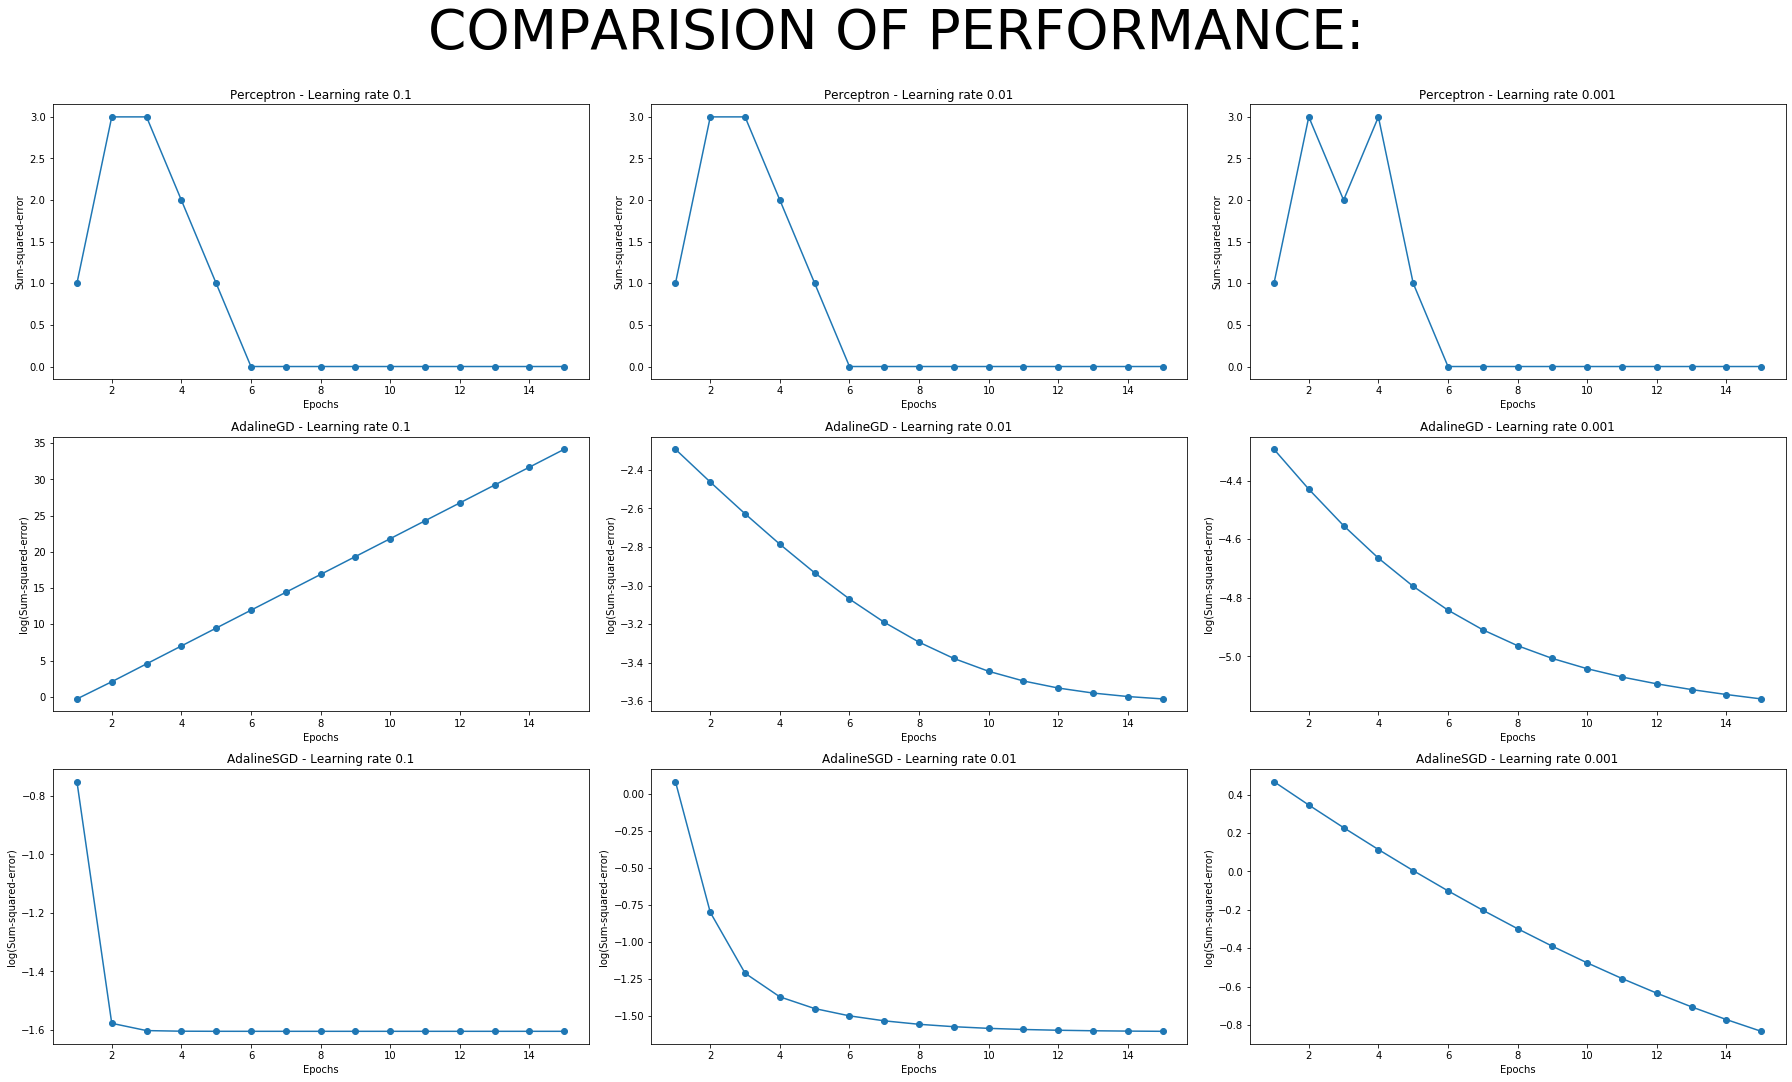

In [48]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 14),tight_layout=True)
lrs=[0.1,0.01,0.001]
for i in range(len(lrs)):
    ppn=Perceptron(eta=lrs[i],epochs=15).fit(x,Y)
    ax[0][i].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    ax[0][i].set_xlabel('Epochs')
    ax[0][i].set_ylabel('Sum-squared-error')
    ax[0][i].set_title('Perceptron - Learning rate '+str(lrs[i]))
for i in range(len(lrs)):
    adaGD=AdalineGD(eta=lrs[i],epochs=15).fit(X_std,Y)
    ax[1][i].plot(range(1, len(adaGD.cost_) + 1),np.log10(adaGD.cost_), marker='o')
    ax[1][i].set_xlabel('Epochs')
    ax[1][i].set_ylabel('log(Sum-squared-error)')
    ax[1][i].set_title('AdalineGD - Learning rate '+str(lrs[i]))
for i in range(len(lrs)):
    adaSGD=AdalineSGD(eta=lrs[i],epochs=15,random_state=1).fit(X_std,Y)
    ax[2][i].plot(range(1, len(adaSGD.cost_) + 1), np.log10(adaSGD.cost_), marker='o')
    ax[2][i].set_xlabel('Epochs')
    ax[2][i].set_ylabel('log(Sum-squared-error)')
    ax[2][i].set_title('AdalineSGD - Learning rate '+str(lrs[i]))
fig.suptitle("COMPARISION OF PERFORMANCE:",fontsize=55,y=1.07,ha="center")
#fig.subplots_adjust(top=1.95)

Text(0.5, 1.07, 'DECISON BOUNDARIES FOR DIFFERENT LR RATES.')

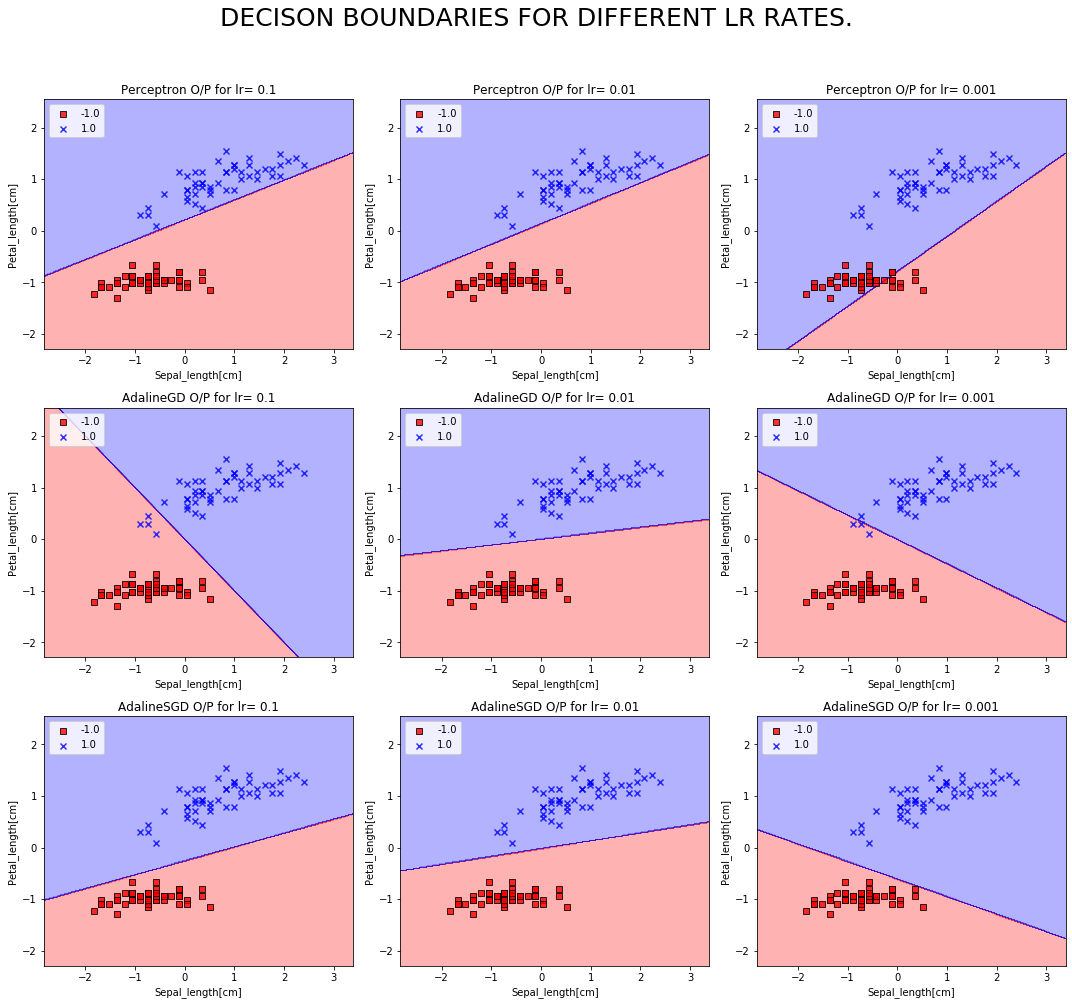

In [49]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,13),tight_layout=True)
lrs=[0.1,0.01,0.001]
for i in range(len(lrs)):
    ppn=Perceptron(eta=lrs[i],epochs=10).fit(x,Y)
    plot_decision(X_std,Y,ppn,0,i,ax)
    ax[0][i].set_xlabel("Sepal_length[cm]")
    ax[0][i].set_ylabel("Petal_length[cm]")
    ax[0][i].set_title("Perceptron O/P for lr= "+str(lrs[i]))
    ax[0][i].legend(loc="upper left")
for i in range(len(lrs)):
    adaGD=AdalineGD(eta=lrs[i],epochs=15).fit(X_std,Y)
    plot_decision(X_std,Y,adaGD,1,i,ax)
    ax[1][i].set_xlabel("Sepal_length[cm]")
    ax[1][i].set_ylabel("Petal_length[cm]")
    ax[1][i].set_title("AdalineGD O/P for lr= "+str(lrs[i]))
    ax[1][i].legend(loc="upper left")
for i in range(len(lrs)):
    adaSGD=AdalineSGD(eta=lrs[i],epochs=15,random_state=1).fit(X_std,Y)
    plot_decision(X_std,Y,adaSGD,2,i,ax)
    ax[2][i].set_xlabel("Sepal_length[cm]")
    ax[2][i].set_ylabel("Petal_length[cm]")
    ax[2][i].set_title("AdalineSGD O/P for lr= "+str(lrs[i]))
    ax[2][i].legend(loc="upper left")
fig.suptitle("DECISON BOUNDARIES FOR DIFFERENT LR RATES.",fontsize=25,y=1.07,ha="center")
#fig.subplots_adjust(top=3.5)